# Branched Convolutional NN

In [1]:
# Import io functions
import setGPU0
from io_functions import *
from draw_functions import *

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.
using gpu0


NameError: name 'model' is not defined

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

## Prepare the data

In [2]:
train_data, test_data, train_labels, test_labels = train_test(shape=(1, 20, 20, 25), split=0.33)

In [3]:
train_data.shape

(54236, 1, 20, 20, 25)

## Create and train the model

In [4]:
model1 = Sequential()
model1.add(Convolution3D(3, 4, 4, 5, input_shape = (1, 20, 20, 25), activation='relu'))
model1.add(MaxPooling3D())
model1.add(Flatten())

model2 = Sequential()
model2.add(Convolution3D(3, 3, 3, 4, input_shape = (1, 20, 20, 25), activation='relu'))
model2.add(MaxPooling3D())
model2.add(Flatten())

model3 = Sequential()
model3.add(Convolution3D(3, 5, 5, 6, input_shape = (1, 20, 20, 25), activation='relu'))
model3.add(MaxPooling3D())
model3.add(Flatten())

## join the two
bmodel = Sequential()
bmodel.add(Merge([model1,model2,model3], mode='concat'))

## fully connected ending
bmodel.add(Dense(1000, activation='relu'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(1, init='uniform', activation='sigmoid'))

bmodel.compile(loss='binary_crossentropy', optimizer='sgd')
bmodel.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution3d_1 (Convolution3D)    (None, 3, 17, 17, 21243                                          
____________________________________________________________________________________________________
maxpooling3d_1 (MaxPooling3D)      (None, 3, 8, 8, 10) 0                                            
____________________________________________________________________________________________________
flatten_1 (Flatten)                (None, 1920)        0                                            
____________________________________________________________________________________________________
convolution3d_2 (Convolution3D)    (None, 3, 18, 18, 22111                                          
___________________________________________________________________________________________

In [13]:
fit_history = bmodel.fit([train_data,train_data,train_data], train_labels, nb_epoch=2, batch_size=1000, verbose=1)

Epoch 1/2
54236/54236 [==============================] - 175s - loss: 0.4465   
Epoch 2/2
54236/54236 [==============================] - 176s - loss: 0.3932   


In [ ]:
predictions = bmodel.predict([test_data, test_data, test_data])
store_model(bmodel, fit_history.history['loss'], 'bcnn', (predictions, test_labels))

### Classification Histogram

In [8]:
# Get the test signal and background to make the histogram
test_signal = test_data[np.where(test_labels==1)]
test_bkg    = test_data[np.where(test_labels==0)]

# Calculate the probabilities for the test sets
p_signal    = bmodel.predict([test_signal,test_signal,test_signal])
p_bkg       = bmodel.predict([test_bkg,test_bkg,test_bkg])


TclError: couldn't connect to display "localhost:11.0"

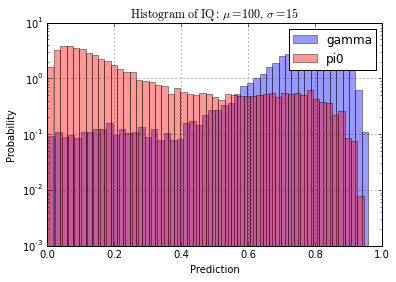

In [10]:
# Draw classification histogram
plt.hist(p_signal, 50, normed=1, facecolor='blue', alpha=0.4, label='gamma')
plt.hist(p_bkg , 50, normed=1, facecolor='red' , alpha=0.4, label='pi0')
plt.xlabel('Prediction')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

### ROC Curve

In [11]:
# Get classification predictions
predictions = bmodel.predict([test_data, test_data, test_data])

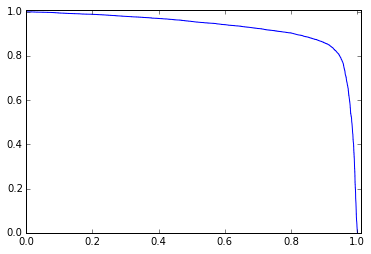

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )

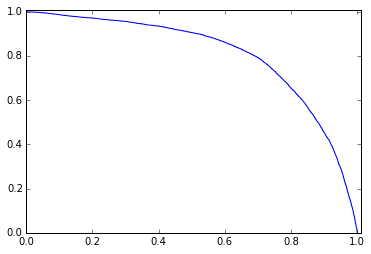

In [15]:
fpr, tpr, _ = roc_curve(test_labels, predictions)
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.plot( tpr, 1-fpr )